# Modified Newton method #



In [2]:
import matplotlib
import numpy as np
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm, lines, collections, colors
import matplotlib.patches as patches
%matplotlib inline

Consider $f(x, y) = \cos(x^2 - 3 y) + \sin(x^2 + y^2)$.

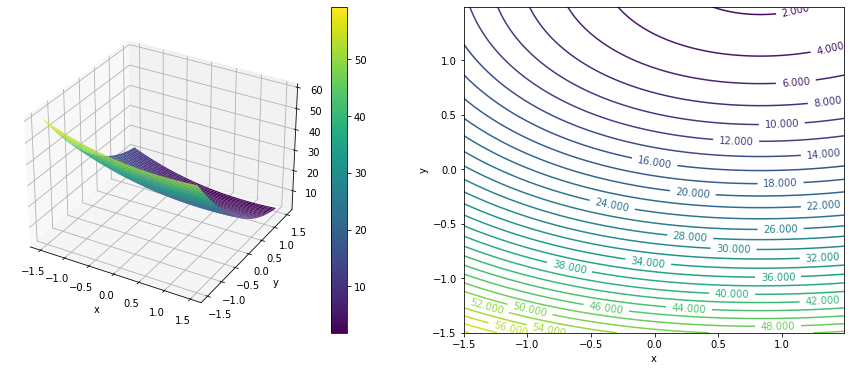

In [24]:
# Define the function

delta = 0.01 # spacing between samples in each dimension
xx = np.arange(-1.5, 1.5, delta)
yy = np.arange(-1.5, 1.5, delta)
X, Y = np.meshgrid(xx, yy)

#Z = np.cos(X**2 - 3*Y) + np.sin(X**2 + Y**2)
Z = 2*(X-1)**2+4*(Y-2)**2+np.sin(X)-np.cos(Y)

# Plot the functions
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)


# Surface plot
surf = ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
fig.colorbar(surf, ax=ax1)

# Contour plot
contours = ax2.contour(X, Y, Z, 30)
ax2.clabel(contours, inline=True, fontsize=10)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

In [25]:
lbx=-1
ubx=1
lby=-1
uby=1

<!-- f = @(x, y) (cos(x.^2 - 3*y)  + sin(x.^2 + y.^2));

gradf = @(x, y) ([ 2*x*cos(x^2 + y^2) - 2*x*sin(x^2 - 3*y); ...
                    3*sin(x^2 - 3*y) + 2*y*cos(x^2 + y^2) ...
                ]);
            
hessf = @(x,y) [ 2*cos(x^2 + y^2) - 2*sin(x^2 - 3*y) - 4*x^2*cos(x^2 - 3*y) - 4*x^2*sin(x^2 + y^2), ...
                    6*x*cos(x^2 - 3*y) - 4*x*y*sin(x^2 + y^2); ...
                 6*x*cos(x^2 - 3*y) - 4*x*y*sin(x^2 + y^2), ...
                    2*cos(x^2 + y^2) - 9*cos(x^2 - 3*y) - 4*y^2*sin(x^2 + y^2)];
 -->

The gradient is given by 
$$\nabla f(x,y) = \begin{pmatrix} 2 x \cos(x^2 + y^2) - 2 x \sin(x^2 - 3y) \\
                                    3 \sin(x^2 - 3 y) + 2 y \cos(x^2 + y^2)
                  \end{pmatrix}.$$

The Hessian is 
$$\nabla^2 f(x,y) = \begin{pmatrix}
                        2 \cos(x^2 + y^2) - 2 \sin(x^2 - 3 y) - 4 x^2 \cos(x^2 - 3y) - 4 x^2 \sin(x^2 + y^2)
                        & 6 x \cos(x^2 - 3 y) - 4 x y \sin(x^2 + y^2)
                        \\ 6 x \cos(x^2 - 3 y) - 4 x y \sin(x^2 + y^2)
                        & 2 \cos(x^2 + y^2) - 9 \cos(x^2 - 3y) - 4 y^2 \sin(x^2 + y^2)
                    \end{pmatrix}.$$

In [26]:
# Define the gradient descent algorithm

# Starting point
x_0 = np.array([-1.0, -1.0])

def proj_box(x):
    return np.array([min(max(x[0], lbx), ubx), min(max(x[1], lby), uby)])
# Function evaluation
def f_eval(v):
    #return np.cos(v[0]**2 - 3*v[1]) + np.sin(v[0]**2 + v[1]**2)
    return 2*(v[0]-1)**2+4*(v[1]-2)**2+np.sin(v[0])-np.cos(v[1])


# Gradient
def gradient(v):
    # the 1st dimension is x, the 2nd dimension is y
    #return np.array([   2*v[0]*np.cos(v[0]**2 + v[1]**2) - 2*v[0]*np.sin(v[0]**2 - 3*v[1]), 
    #                    3*np.sin(v[0]**2 - 3*v[1]) + 2*v[1]*np.cos(v[0]**2 + v[1]**2) ])
    return np.array([4*(v[0]-1)+np.cos(v[0]),8*(v[1]-2)+np.sin(v[1])])

# Hessian
def hessian(v):  
    #return np.array([ [ 2*np.cos(v[0]**2 + v[1]**2) - 2*np.sin(v[0]**2 - 3*v[1]) 
    #                    - 4*(v[0]**2)*np.cos(v[0]**2 - 3*v[1]) - 4*(v[0]**2)*np.sin(v[0]**2 + v[1]**2), 
    #                    6*v[0]*np.cos(v[0]**2 - 3*v[1]) - 4*v[0]*v[1]*np.sin(v[0]**2 + v[1]**2)], 
    #                  [ 6*v[0]*np.cos(v[0]**2 - 3*v[1]) - 4*v[0]*v[1]*np.sin(v[0]**2 + v[1]**2), 
    #                    2*np.cos(v[0]**2 + v[1]**2) - 9*np.cos(v[0]**2 - 3*v[1]) 
    #                        - 4*(v[1]**2)*np.sin(v[0]**2 + v[1]**2)] ]);
    return np.array([[4-np.sin(v[0]),0],[0,8+np.cos(v[1])]])

# Hessian modification using Gershgorin's circle theorem
def modified_Hessian(v):
    hessian_matrix = hessian(v)
    
    d_multiple = max(0, 
                     0.1 +  np.abs(hessian_matrix[0,1]) - hessian_matrix[0,0], 
                     0.1 +  np.abs(hessian_matrix[1,0]) - hessian_matrix[1,1]) 
    return hessian_matrix + d_multiple * np.eye(2)

# Tolerance
tolerance = 1e-15

In [32]:
# Newton iteration
x = x_0
lines_Newton = []
eta = 1
xval = []
xval += [x]
val = []
val += [f_eval(x)]
# Run Newton method
for ii in range(10000):   
    print(f'Current iterate, function value = {x},{f_eval(x)}.')
    step = - np.matmul(np.linalg.inv(hessian(x)),  gradient(x)) * eta
        # Try the above line with modified_Hessian instead.
    x_prime = x + step
    x_prime = proj_box(x_prime)
    xval += [x_prime]
    val += [f_eval(x_prime)]
    lines_Newton.append([x.tolist(), x_prime.tolist()])
    
    # Termination criterion 2    
    #if np.all(np.abs(step) <= tolerance):
    #    break
    if np.all(np.abs(x-x_prime) <= tolerance):
        break
        
    x = x_prime
    
print(f'Newton method: Final iterate = {x}.')
print(f'Newton method: Number of iterations = {ii}.')
print(f'Objective function at final iterte = {f_eval(x)}.')


Current iterate, function value = [-1. -1.],42.61822670932396.
Current iterate, function value = [0.54079157 1.        ],4.3962572225653265.
Current iterate, function value = [0.82184759 1.        ],4.255579302756422.
Current iterate, function value = [0.8315613 1.       ],4.255425040241612.
Current iterate, function value = [0.83157111 1.        ],4.255425040084507.
Current iterate, function value = [0.83157111 1.        ],4.255425040084507.
Newton method: Final iterate = [0.83157111 1.        ].
Newton method: Number of iterations = 5.
Objective function at final iterte = 4.255425040084507.


In [39]:
xval = np.array(xval)
val = np.array(val)

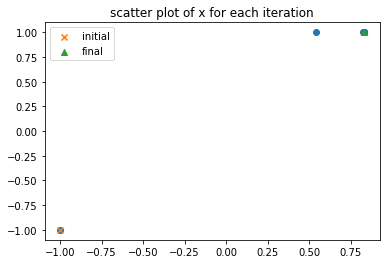

In [42]:
plt.scatter(xval[:,0],xval[:,1])
plt.scatter(xval[0,0],xval[0,1],marker = 'x',label='initial')
plt.scatter(xval[-1,0],xval[-1,1],marker='^',label='final')
plt.title('scatter plot of x for each iteration')
plt.legend()

Text(0.5, 0, 'number of iteartion n')

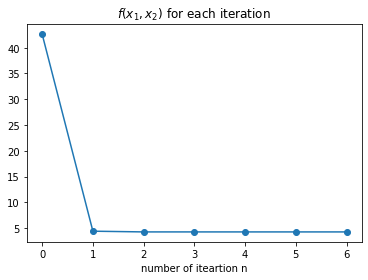

In [48]:
plt.plot(val,'-o')
plt.title('$f(x_1,x_2)$ for each iteration')
plt.xlabel('number of iteartion n')

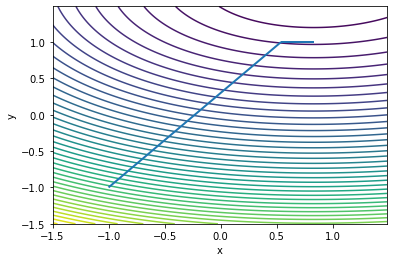

In [28]:
# Contour plot again with descent dynamics
fig = plt.figure()
ax = fig.add_subplot()

contours = ax.contour(X, Y, Z, 50)

lc_Newton = collections.LineCollection(lines_Newton,linewidths=2)
ax.add_collection(lc_Newton)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

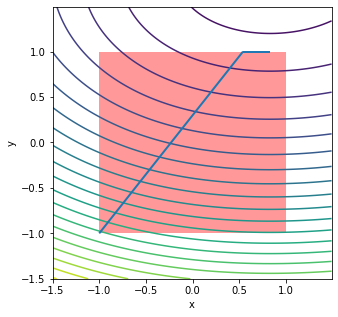

In [31]:
# Contour plot again with descent dynamics
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

contours = ax.contour(X, Y, Z, 20)
ax.add_patch(
    patches.Rectangle((lbx, lby), ubx-lbx, uby-lby,  facecolor = 'red', fill=True, alpha=0.4)
)

lc = collections.LineCollection(lines_Newton,linewidths=2)
ax.add_collection(lc)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()